In [14]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re

reddit_name = 'ttcafterloss'
data = pd.read_csv('./data/reddit/' + reddit_name + '_df')

/Users/divyas/miniconda2/envs/scrape/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,51,56,57,59,65,68,87,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
data.keys()

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'approved_at_utc',
       'author', 'author_cakeday', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_id', 'author_patreon_flair',
       'author_premium', 'awarders', 'banned_at_utc', 'banned_by',
       'brand_safe', 'can_mod_post', 'contest_mode', 'created_utc',
       'crosspost_parent', 'crosspost_parent_list', 'distinguished', 'domain',
       'edited', 'full_link', 'gilded', 'gildings', 'id', 'is_crosspostable',
       'is_meta', 'is_original_content', 'is_reddit_media_domain',
       'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type',

# Analyzing user flairs

In [16]:
x = list(data['author_flair_text'])
print("Total # users: ",  len(x)) 
x = [g for g in x if (type(g) == str)]
print("Total #  flaired users: ", len(x))
x = list(set(x))
flaired_users = data[data['author_flair_text'].isin(x)]
flaired_users = flaired_users.drop_duplicates(subset='author', keep='first')
x = flaired_users['author_flair_text']
print("Total # unique flaired users: ", len(x))
separated = [re.split(',|\||/', g) for g in x] 

def map_to_binary_var(flair_text, term):
    if term in flair_text.lower():
        return 1
    return 0

treatments = ['iui', 'fet', 'ohss', 'ivf', 'icsi', 'ivm', 'hsg']
preconds = ['pcos', 'endo', 'dor','mf']
for term in treatments:
    flaired_users[term] = flaired_users['author_flair_text'].apply(lambda x: map_to_binary_var(x,term))
for term in preconds:
    flaired_users[term] = flaired_users['author_flair_text'].apply(lambda x: map_to_binary_var(x,term))


Total # users:  9972
Total #  flaired users:  1901
Total # unique flaired users:  662


# Distribution of user ages?

# Users with shared ages:  251
After filtering 'ages' < 20:  213


Text(0.5, 1.0, 'Distribution of User Ages on r/ttcafterloss')

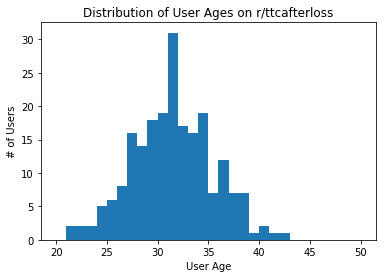

In [17]:
ages = []
for g in separated:
    try: 
        age = int(g[0][:2])
        ages.append(int(g[0][:2]))
    except:
        pass
print("# Users with shared ages: ", len(ages))
ages = [g for g in ages if g > 20]
print("After filtering 'ages' < 20: ", len(ages))

plt.hist(ages, range=(20, 50), bins=30)
plt.xlabel("User Age")
plt.ylabel("# of Users")
plt.title("Distribution of User Ages on r/" + reddit_name)

# Topic analysis of text posts

In [7]:
concatenated_flairs = sum(separated, [])
concatenated_flairs = [g.lower() for g in concatenated_flairs]

treatments = ['iui', 'fet', 'ohss', 'ivf']
preconds = ['pcos', 'endo', 'dor', 'mfi']
for term in treatments:
    term_list = [g for g in concatenated_flairs if term in g]
    print("Term: ", term, ",", len(term_list))

for term in preconds:
    term_list = [g for g in concatenated_flairs if term in g]
    print("Term: ", term, ",", len(term_list))

# POF, Endo, DOR, MFI, 
# numbers of IUIs
# FET

Term:  iui , 8
Term:  fet , 1
Term:  ohss , 0
Term:  ivf , 13
Term:  pcos , 34
Term:  endo , 5
Term:  dor , 0
Term:  mfi , 6


In [8]:
set(concatenated_flairs)

{'',
 '31 ',
 ' mmc 5',
 ' tfmr (t18) 2',
 '20wk loss',
 ' waiting to try again',
 ' 5mc ',
 'skylar',
 ' uterine septum ',
 ' 2 mc',
 ' stillborn daughter 41+5',
 '18 - #1 neonatal loss @ 24 weeks',
 ' 1 mc 1 epw',
 '16)',
 ' mmc 8 wks 12',
 '06',
 ' nov18',
 'mmc 2',
 '6',
 'pprom',
 ' several missed miscarriages. i stopped counting.',
 'riyad: stillborn at 38 weeks 11-4-16',
 'mmc 7 weeks',
 ' ectopic  10',
 'trying since may 2014',
 ' currently 0 for 2 (cp',
 ' ttc #1 cycle 7 after ep',
 '18) (10',
 ' mc 5w 9',
 '15 ~ mc 12',
 ' mmc 15w 2',
 '25% success rate',
 '2 (11+5) - ttc #1',
 '36f',
 '11',
 'harrison born still @ 23w (3',
 'eliza - 15w loss to trisomy 18',
 ' mmc @ 13w',
 'ttc cycle 1',
 ' 1 ep',
 ' mc 1.19',
 ' 1 cp 7',
 '16 @ 7 weeks',
 'mmc',
 'ttc 1 - mc',
 'clomid#3',
 ' cycle 2 ',
 ' 1 mc 12',
 '1 mc16aug16',
 'james 11',
 ' 0',
 '34',
 '18',
 " mmc jun '18",
 'ttc:#1',
 '33',
 ' 1 mc.',
 '2mmcs @8w 10',
 ' 2 cps in 2015',
 ' anna stilborn 35 weeks may 2018',
 '19 ',


In [ ]:
#mmc, mc, cp, ep, clomid, stillborn, ecto, wttc, pcos,

# Correlation of different 